<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase4(MiniProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   match_id  batting_team  bowling_team  current_run_rate  wickets_remaining  \
0       103             2             1          5.591214                  6   
1       436             4             1          5.463938                  4   
2       861             8             2          9.838063                  5   
3       271             7             2          6.358586                  6   
4       107             9             6          9.352279                  2   
5        72             8             7          7.786832                  9   
6       701             5             5          8.768868                  2   
7        21             2             1          7.015823                  4   

   runs_remaining       over    avg_runs  total_wickets  innings  winner  
0              98  14.884233  193.220574              5        2       0  
1             104  13.620789  173.208460              4        1       0  
2              29   4.750129  198.632391              

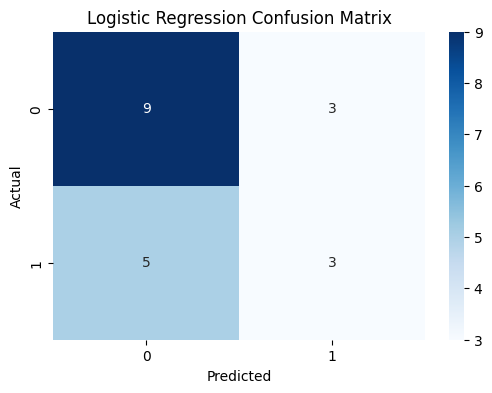



--- Random Forest ---
Accuracy: 0.60
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Confusion Matrix:


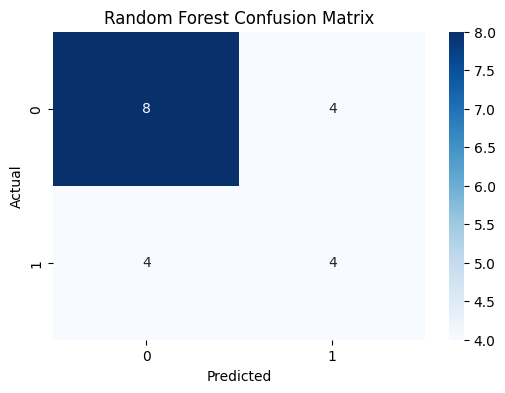



--- Gradient Boosting ---
Accuracy: 0.45
Precision: 0.29
Recall: 0.25
F1 Score: 0.27
Confusion Matrix:


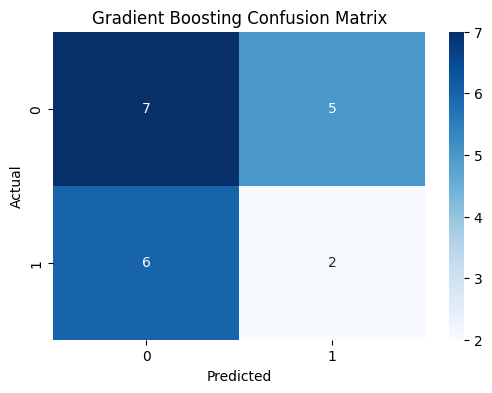



--- Deep Learning Model ---
Accuracy: 0.50
Precision: 0.38
Recall: 0.38
F1 Score: 0.38
Confusion Matrix:


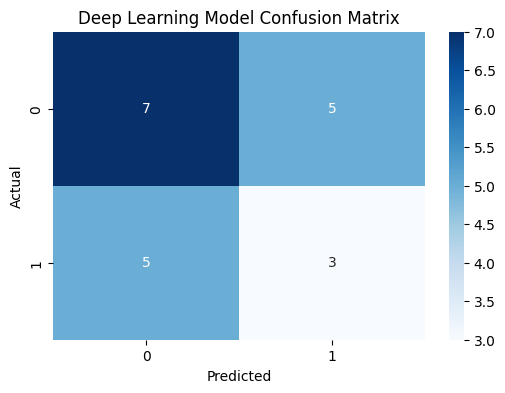



--- Best Random Forest ---
Accuracy: 0.60
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Confusion Matrix:


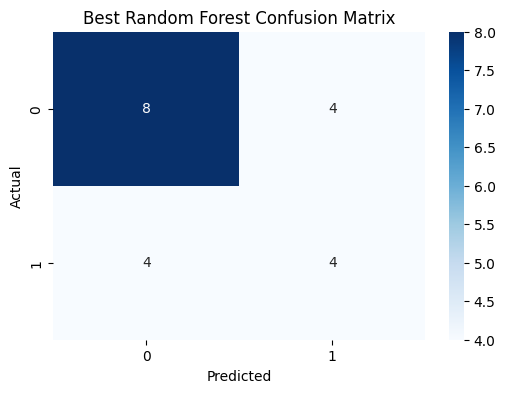



Example Prediction after loading the model: [0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
    Actual  RF_Pred  DL_Pred  RF_Prob   DL_Prob
83       0        0        0     0.32  0.127596
53       0        1        1     0.66  0.548583
70       0        0        0     0.30  0.437802
45       0        0        0     0.38  0.273340
44       0        0        0     0.26  0.369924
39       1        0        0     0.43  0.437508
22       0        1        1     0.58  0.878434
80       0        1        1     0.71  0.812265
10       1        0        0     0.22  0.041020
0        0        0        0     0.08  0.080842


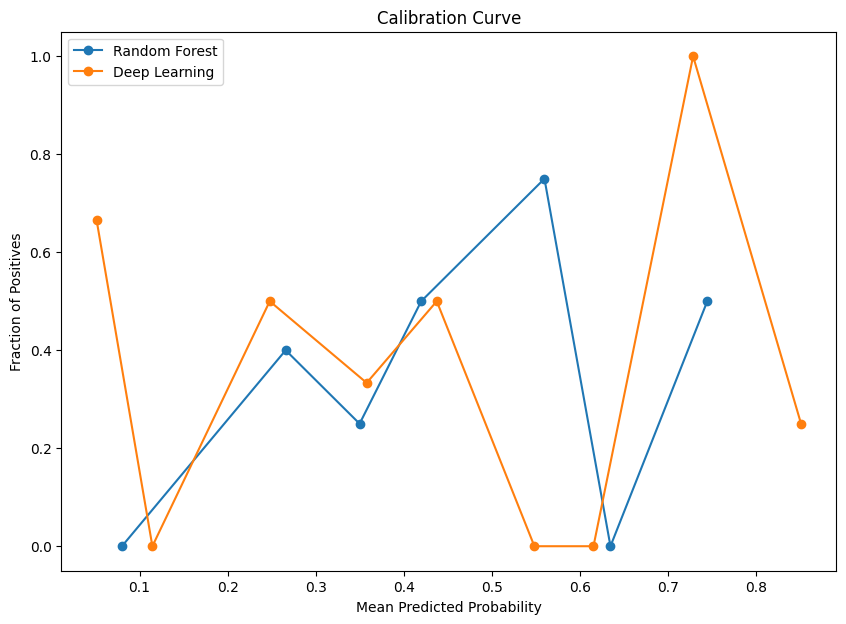



Winning Probability: 49.25%
Predicted Class: 0 (1 means win, 0 means lose)
Final Probabilities and Scoreline:
Random Forest Probability of Winning for Team 1: 52.00%
Random Forest Probability of Winning for Team 2: 48.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Deep Learning Probability of Winning for Team 1: 0.00%
Deep Learning Probability of Winning for Team 2: 100.00%
Estimated Final Score: 172.50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

# Step 1: Data Collection
# Load the dataset
data = pd.read_csv('/content/ipl_score_predictor_data.csv')
print(data.head(8))
print(data.columns)
print(data.shape)

# Step 2: Data Preprocessing
X = data.drop('winner', axis=1)
y = data['winner']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

feature_names = X.columns
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Deep Learning Model using Neural Networks
dl_model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype("int32").flatten()

# Step 4: Model Evaluation

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n")

# Evaluate all models
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_dl, "Deep Learning Model")

# Step 5: Hyperparameter Tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Best Random Forest")

# Step 6: Save the Best Model
joblib.dump(best_rf_model, 'ipl_score_predictor_rf.pkl')

# Example of loading the model and making predictions
loaded_model = joblib.load('ipl_score_predictor_rf.pkl')
example_prediction = loaded_model.predict(X_test[:1])
print('Example Prediction after loading the model:', example_prediction)
print('\n')


def predict_match_outcome(match_situation):
    match_data = pd.DataFrame([match_situation])
    match_data['batting_team'] = match_data['batting_team'].astype('category').cat.codes
    match_data['bowling_team'] = match_data['bowling_team'].astype('category').cat.codes

    # Random Forest predictions
    rf_probabilities = rf_model.predict_proba(match_data)
    print(f"Random Forest Probability of Winning for Team 1: {rf_probabilities[0, 0] * 100:.2f}%")
    print(f"Random Forest Probability of Winning for Team 2: {rf_probabilities[0, 1] * 100:.2f}%")

    # Deep Learning predictions
    dl_probability = dl_model.predict(match_data)[0][0]
    print(f"Deep Learning Probability of Winning for Team 1: {dl_probability * 100:.2f}%")
    print(f"Deep Learning Probability of Winning for Team 2: {(1 - dl_probability) * 100:.2f}%")

    runs_scored = match_situation['current_run_rate'] * match_situation['over']
    predicted_final_score = runs_scored + (match_situation['runs_remaining'] / (1 - dl_probability))
    print(f"Estimated Final Score: {predicted_final_score:.2f}")

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming `model` is your Random Forest model and `dl_model` is your Deep Learning model
# Define predictions for Random Forest and Deep Learning models
y_pred_rf = rf_model.predict(X_test)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype(int).flatten()  # Ensure binary predictions

# Define predicted probabilities
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
dl_probabilities = dl_model.predict(X_test).flatten()  # Assuming it gives probabilities for class 1

# Create a DataFrame to compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Pred': y_pred_rf,
    'DL_Pred': y_pred_dl,
    'RF_Prob': rf_probabilities,
    'DL_Prob': dl_probabilities
})
print(comparison_df.head(10))

# Function to plot calibration curves
def plot_calibration_curve(probabilities, true_labels, model_name):
    fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, probabilities, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model_name)

# Plot calibration curves for both models
plt.figure(figsize=(10, 7))
plot_calibration_curve(rf_probabilities, y_test, 'Random Forest')
plot_calibration_curve(dl_probabilities, y_test, 'Deep Learning')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
print('\n')

# Example usage
match_situation = {
    'match_id': 1,
    'batting_team': 2,
    'bowling_team': 4,
    'current_run_rate': 7.5,
    'wickets_remaining': 5,
    'runs_remaining': 60,
    'over': 15,
    'avg_runs': 150,
    'total_wickets': 10,
    'innings': 2
}

# Load the best model and scaler
loaded_model = joblib.load('ipl_score_predictor_rf.pkl')

# Example of predicting the winning probability
winning_prob, predicted_class = predict_winning_probability(loaded_model, match_situation, scaler)
print(f'Winning Probability: {winning_prob * 100:.2f}%')
print(f'Predicted Class: {predicted_class} (1 means win, 0 means lose)')
print("Final Probabilities and Scoreline:")
predict_match_outcome(match_situation)


   match_id  batting_team  bowling_team  current_run_rate  wickets_remaining  \
0       103             2             1          5.591214                  6   
1       436             4             1          5.463938                  4   
2       861             8             2          9.838063                  5   
3       271             7             2          6.358586                  6   
4       107             9             6          9.352279                  2   
5        72             8             7          7.786832                  9   
6       701             5             5          8.768868                  2   
7        21             2             1          7.015823                  4   

   runs_remaining       over    avg_runs  total_wickets  innings  winner  
0              98  14.884233  193.220574              5        2       0  
1             104  13.620789  173.208460              4        1       0  
2              29   4.750129  198.632391              

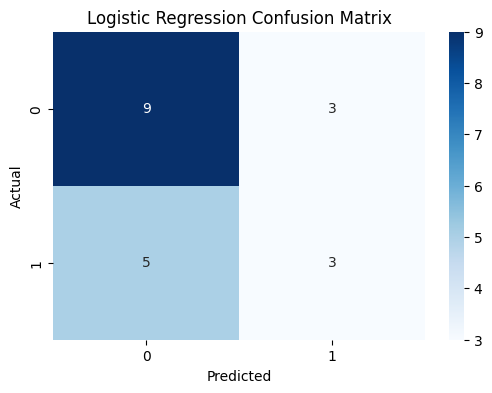



--- Random Forest ---
Accuracy: 0.60
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Confusion Matrix:


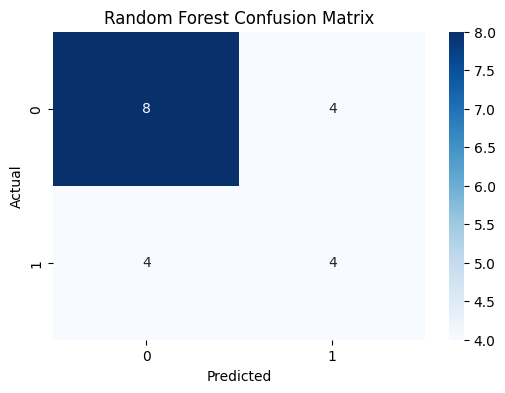



--- Gradient Boosting ---
Accuracy: 0.45
Precision: 0.29
Recall: 0.25
F1 Score: 0.27
Confusion Matrix:


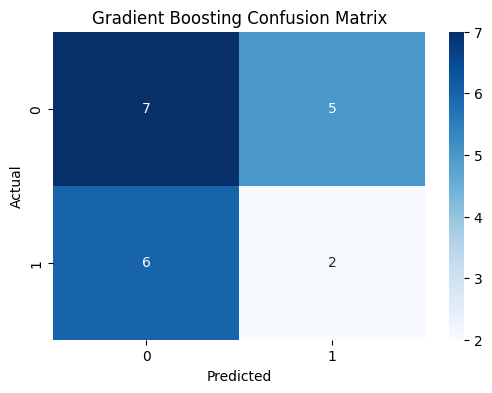



--- Deep Learning Model ---
Accuracy: 0.50
Precision: 0.33
Recall: 0.25
F1 Score: 0.29
Confusion Matrix:


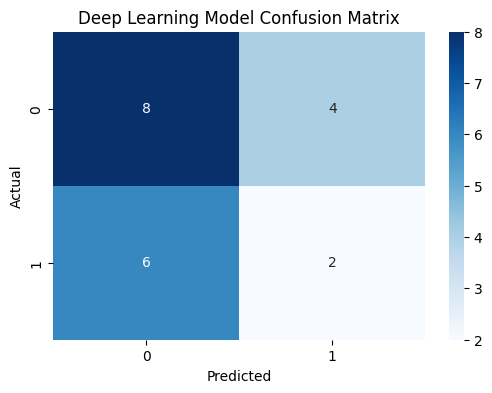



--- Best Random Forest ---
Accuracy: 0.60
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Confusion Matrix:


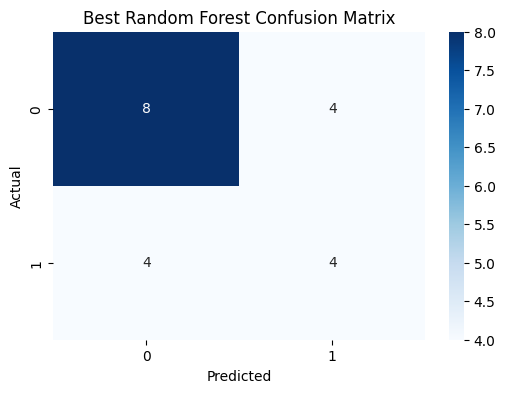



Example Prediction after loading the model: [0]


Random Forest Probability of Winning for Team 1: 55.00%
Random Forest Probability of Winning for Team 2: 45.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Deep Learning Probability of Winning for Team 1: 40.83%
Deep Learning Probability of Winning for Team 2: 59.17%
Estimated Final Score: 213.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
    Actual  RF_Pred  DL_Pred  RF_Prob   DL_Prob
83       0        0        0     0.32  0.083269
53       0        1        0     0.66  0.413214
70       0        0        0     0.30  0.376749
45       0        0        0     0.38  0.300074
44       0        0        0     0.26  0.344450
39       1        0        0     0.43  0.323400
22       0        1        1     0.58  0.940289
80       0        1        1     0.71  0.831433
10       1        0        0     0.22  0.175890
0        0        0        0     0.08  0.126773


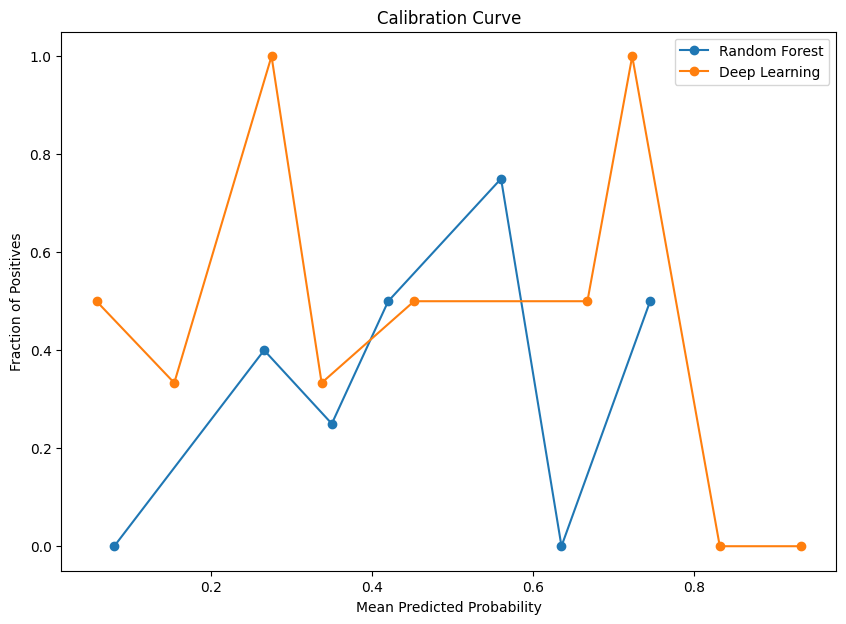

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

# Step 1: Data Collection
# Load the dataset
data = pd.read_csv('/content/ipl_score_predictor_data.csv')
print(data.head(8))
print(data.columns)
print(data.shape)

# Step 2: Data Preprocessing
X = data.drop('winner', axis=1)
y = data['winner']

# Standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  # Convert back to DataFrame after scaling

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

feature_names = X.columns
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Deep Learning Model using Neural Networks
dl_model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dl_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype("int32").flatten()

# Step 4: Model Evaluation

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n")

# Evaluate all models
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_dl, "Deep Learning Model")

# Step 5: Hyperparameter Tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Best Random Forest")

# Step 6: Save the Best Model
joblib.dump(best_rf_model, 'ipl_score_predictor_rf.pkl')

# Example of loading the model and making predictions
loaded_model = joblib.load('ipl_score_predictor_rf.pkl')
example_prediction = loaded_model.predict(X_test[:1])
print('Example Prediction after loading the model:', example_prediction)
print('\n')

# Function to predict the winning probabilities and scoreline for a specific match situation
def predict_match_outcome(match_situation):
    match_data = pd.DataFrame([match_situation])
    match_data = pd.DataFrame(scaler.transform(match_data), columns=match_data.columns)  # Standardize input

    # Random Forest predictions
    rf_probabilities = rf_model.predict_proba(match_data)
    print(f"Random Forest Probability of Winning for Team 1: {rf_probabilities[0, 0] * 100:.2f}%")
    print(f"Random Forest Probability of Winning for Team 2: {rf_probabilities[0, 1] * 100:.2f}%")

    # Deep Learning predictions
    dl_probability = dl_model.predict(match_data)[0][0]
    print(f"Deep Learning Probability of Winning for Team 1: {dl_probability * 100:.2f}%")
    print(f"Deep Learning Probability of Winning for Team 2: {(1 - dl_probability) * 100:.2f}%")

    runs_scored = match_situation['current_run_rate'] * match_situation['over']
    predicted_final_score = runs_scored + (match_situation['runs_remaining'] / (1 - dl_probability))
    print(f"Estimated Final Score: {predicted_final_score:.2f}")

# Example usage
match_situation = {
    'match_id': 1,
    'batting_team': 2,
    'bowling_team': 4,
    'current_run_rate': 7.5,
    'wickets_remaining': 5,
    'runs_remaining': 60,
    'over': 15,
    'avg_runs': 150,
    'total_wickets': 10,
    'innings': 2
}

# Example of predicting the winning probability
predict_match_outcome(match_situation)

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Assuming `model` is your Random Forest model and `dl_model` is your Deep Learning model
# Define predictions for Random Forest and Deep Learning models
y_pred_rf = rf_model.predict(X_test)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype(int).flatten()  # Ensure binary predictions

# Define predicted probabilities
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
dl_probabilities = dl_model.predict(X_test).flatten()  # Assuming it gives probabilities for class 1

# Create a DataFrame to compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Pred': y_pred_rf,
    'DL_Pred': y_pred_dl,
    'RF_Prob': rf_probabilities,
    'DL_Prob': dl_probabilities
})
print(comparison_df.head(10))

# Function to plot calibration curves
def plot_calibration_curve(probabilities, true_labels, model_name):
    fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, probabilities, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model_name)

# Plot calibration curves for both models
plt.figure(figsize=(10, 7))
plot_calibration_curve(rf_probabilities, y_test, 'Random Forest')
plot_calibration_curve(dl_probabilities, y_test, 'Deep Learning')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
print('\n')
